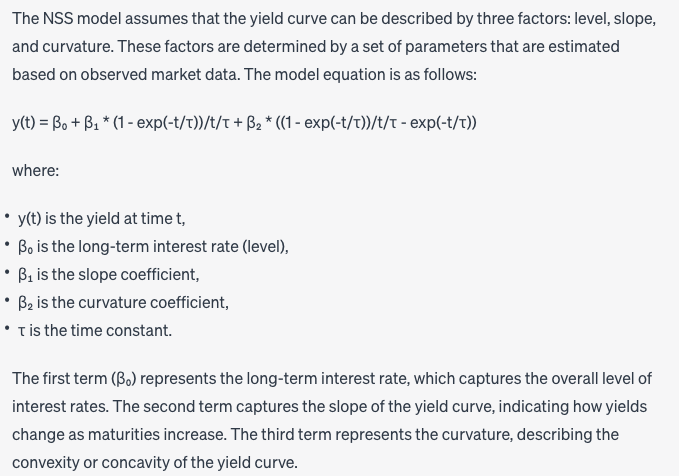

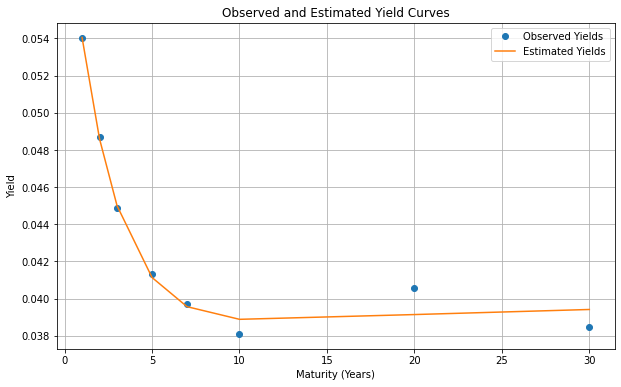

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Nelson-Siegel-Svensson model equation
def nss_model(params, t):
    beta0, beta1, beta2, tau = params
    return beta0 + beta1 * ((1 - np.exp(-t/tau))/(t/tau)) + beta2 * (((1 - np.exp(-t/tau))/(t/tau)) - np.exp(-t/tau))

# Define the objective function to minimize (root mean squared error)
def objective_function(params, t, y):
    predicted_y = nss_model(params, t)
    return np.sqrt(np.mean((y - predicted_y)**2))

# Example data: maturities (t) and corresponding yields (y)
t = np.array([1, 2, 3, 5, 7, 10, 20, 30])
y = np.array([0.054, 0.0487, 0.0449, 0.0413, 0.0397, 0.0381, 0.0406, 0.0385]) #as of 6.30.23


# Initial guess for the parameters
initial_params = np.array([0.05, -0.02, 0.02, 5])

# Minimize the objective function to estimate the parameters
result = minimize(objective_function, initial_params, args=(t, y))

# Extract the estimated parameters
estimated_params = result.x
beta0, beta1, beta2, tau = estimated_params

# Generate the estimated yield curve
estimated_yields = nss_model(estimated_params, t)

# Plot the observed and estimated yield curves
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'o', label='Observed Yields')
plt.plot(t, estimated_yields, label='Estimated Yields')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield')
plt.title('Observed and Estimated Yield Curves')
plt.legend()
plt.grid(True)
plt.show()